# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 2

Do wykonania zadań proszę zapoznać się z metodami, właściwościami, oraz funkcjami:
`__repr__`, `__str__`, `__add__`, `__sub__`, `__eq__`, `__lt__`, `__gt__`, `__le__`, `__ge__`, `__ne__`, `__hash__`, `__truediv__`, `__mul__`, `__class__`, `__name__`, `id`.

Operatory: https://docs.python.org/3/library/operator.html


**UWAGA**: W niniejszym laboratorium proszę nie korzystać z zewnętrzych modułów/bibliotek (poza biblioteką _matplotlib_).

**UWAGA 2**: Obsługę błędów należy zrealizować w postaci wyjątków.

### Zadanie 1

Napisz klasę `Vector` udostępniającą funkcjonalność:
- reprezentuje wektor dowolnej długości,
- obiekt inicjowany listą (np. `Vector([1, 2, 3])`,
- posiada funkcję zwracającą moduł wektora,
- umożliwia dodawanie (`+`) i odejmowanie (`-`) wektorów. Dodaj obsługę błędów (różna długość (liczba elementów) wektora),
- możliwość wyświetlenia wektora jako listy za pomocą funkcji `print(v)` (metoda `__str__`),
- uruchomienie komórki zawierającej jedynie nazwę zmiennej (typu `Vector`) spowoduje wyświetlenie nazwy typu `Vector`, adresu zmiennej w pamięci (funkcja `id`) oraz jej zawartości, np. `<Vector([1, 2, 3]) at 140185630442880>` (metoda `__repr__`)

In [13]:
import math
import matplotlib.pyplot as plt


class Vector:
    def __init__(self, v):
        self.v = tuple(v)  

        
    def __str__(self):
        return str(self.v)
    
    def __add__(self, v1):
        if len(v1.v) == len(self.v):
            res = []
            for i in range(len(v1.v)):
                res.append(self.v[i] + v1.v[i])
            return res
        else:
            raise ValueError("Vectors must be of the same length")
            
    def __sub__(self, v1):
        if len(v1.v) == len(self.v):
            res = []
            for i in range(len(v1.v)):
                res.append(self.v[i] - v1.v[i])
            return res
        else:
            raise ValueError("Vectors must be of the same length")
            
    def module(self):
        return math.sqrt(sum(x**2 for x in self.v))    
    
    def __repr__(self):
        return f"<{self.__class__.__name__}({self.v}) at {hex(id(self))}>"
    
    def __eq__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] == v1.v[i])
        return Vector(res)

    def __ne__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] != v1.v[i])
        return Vector(res)
    
    def __le__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] <= v1.v[i])
        return Vector(res)
    
    def __ge__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] >= v1.v[i])
        return Vector(res)
    
    def __lt__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] < v1.v[i])
        return Vector(res)
    
    def __gt__(self, v1): 
        if len(v1.v) != len(self.v):
            raise ValueError("Vectors must be of the same length")
        res = []
        for i in range(len(v1.v)):
            res.append(self.v[i] > v1.v[i])
        return Vector(res)
    
    def __hash__(self):
        return hash(self.v)
    
    def __mul__(self, scalar):
        if not isinstance(scalar, (int, float)):
            raise TypeError(f"Multiplication is only supported with scalars (int or float), not {type(scalar).__name__}")
        return Vector(tuple(x * scalar for x in self.v))

    def __truediv__(self, scalar):
        if not isinstance(scalar, (int, float)):
            raise TypeError(f"Division is only supported with scalars (int or float), not {type(scalar).__name__}")
        if scalar == 0:
            raise ZeroDivisionError("Cannot divide by zero")
        return Vector(tuple(x / scalar for x in self.v))


    def plot(self):
        if len(self.v) != 2: 
            raise ValueError("Vectors max length is 2")
        
        plt.figure(figsize=(5, 5))
        plt.arrow(0, 0, self.v[0], self.v[1], 
                  head_width=0.2, head_length=0.3, fc='red', ec='red')
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Wizualizacja wektora")
        plt.show()
        
    
v1 = Vector([1, 2, 4, 5])
print(v1 - Vector([3, 4 , 5, 8]))
v1 > v1
            

[-2, -2, -1, -3]


<Vector((False, False, False, False)) at 0x1ca83d89850>

### Zadanie 2

Do wcześniej zaimplementowanej klasy dopisz funkcje pozwalające na porównanie wektorów za pomocą operatorów: `==`, `>=`, `<=`, `>`, `<`, `!=`. Porównanie ma zostać wykonane na poziomie elementów wektorów (_element wise_), poniżej przykład:

```ipython
 In [1]: a = Vector([1, 2, 3]) \
    ...: b = Vector([3, 2, 1]) \
    ...: a <= b
Out [1]: <Vector([True, True, False]) at 140185575662832>
```

In [14]:
v1 = Vector([1, 3 , 5])
v2 = Vector([2, 2 , 7])

v1 < v2

<Vector((True, False, True)) at 0x1ca83dbd690>

### Zadanie 3

Napisz funkcję umożliwiającą wyświetlenie wektora (`Vector`) zaczepionego w punkcie (0,0) na wykresie (zaimplementuj wyświetlanie za pomocą biblioteki `matplotlib`. 

> **UWAGA**: Funkcja powinna działać tylko dla wektora o dwóch wymiarach (dwuelementowa lista) - wykres 2D i wyświetlać komunikat jeżeli wymiar jest inny.

> Podpowiedź: możesz wykorzystać funkcję [matplotlib.pyplot.arrow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.arrow.html)

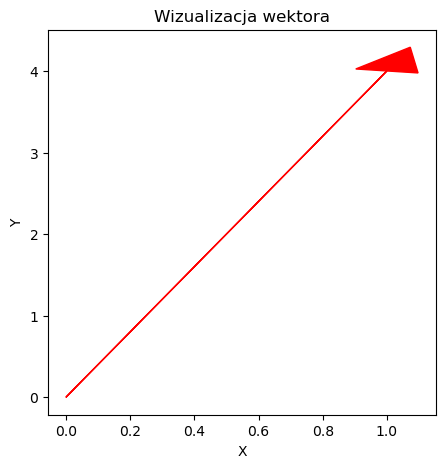

In [15]:
v1 = Vector([1, 4])

v1.plot()

### Zadanie 4

Dodaj możliwość zastosowania obiektu klasy `Vector` jako klucza w słowniku. Np.:

```python
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]
```

In [16]:
d = {
    Vector([1, 2, 3]): 'Wektor 1',
    Vector([2, 2, 3]): 'Wektor 2'
}
d[Vector([2, 2, 3])]

'Wektor 2'

### Zadanie 5

Dodaj funkcjonalność:
- dzielenia przez skalar (np. `Vector([2, 4]) / 2`),
- mnożenia przez skalar (np. `Vector([2, 4]) * 2`).

> Podpowiedź: Pamiętaj o obsłudze błędów.

In [18]:
Vector([2, 4]) * 2

<Vector((1.0, 2.0)) at 0x1ca83dbda90>

In [19]:
Vector([2, 4]) / 2

<Vector((1.0, 2.0)) at 0x1ca83ca9150>